<center>

**Universidad Tecnologica de Panama**
<br></br>
**Facultad de Ingenieria en Sistemas Computacionales**

**Maestria en Analisis de Datos**

**Profesor:** Luis Mendoza
<br></br>
**Laboratorio #1: Analisis Exploratorio**

**Dataset: Board Game Data Analysis and Popularity Prediction
**

https://www.kaggle.com/code/devraai/board-game-data-analysis-and-popularity-prediction
<br></br>

**Presentado por:**

Juan Bocaranda 2-741-2264<br>
Luis Carlos Lasso 8-811-1615<br>
Jesus Solis 8-917-85<br>
Roberto Villareal 20-15-8509<br>
<br></br>
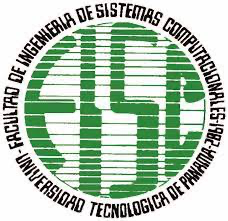


</center>


In [8]:
# import libraries
import pandas as pd
import numpy as np

# Reading file
df = pd.read_csv('/content/bgg.csv',  encoding='ISO-8859-1')
df.head(15)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
5,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,8.87,6,3.55,21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"
6,182028.0,Through the Ages: A New Story of Civilization,2015.0,2,4,120,14,23061,8.43,7,4.41,26985.0,"Action Points, Auction/Bidding, Auction: Dutch...",Strategy Games
7,220308.0,Gaia Project,2017.0,1,4,150,12,16352,8.49,8,4.35,20312.0,"End Game Bonuses, Hexagon Grid, Income, Modula...",Strategy Games
8,187645.0,Star Wars: Rebellion,2016.0,2,4,240,14,23081,8.42,9,3.71,34849.0,"Area Majority / Influence, Area Movement, Area...",Thematic Games
9,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,8.29,10,3.59,56219.0,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

El dataset esta conformado de 20343 obsevaciones en donde no existen espacios vacios. Contiene 14 columnas , 3 columnas son descriptivas y el resto de columnas son cuantitativas.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


Para realizar el análisis descriptivo utilizamos la función describe() , que nos brinda un tabla que incluye por cada columna las cantidades, promedios, desviación estándar, los valores mínimos y máximos.


In [10]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [14]:
df.isnull().sum() # hay valores nulos o vacios

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

Verificamos la cantidad de filas y columnas

In [15]:
df.shape

(20343, 14)

Verificamos el nombre de las columnas

In [16]:
df.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

A continuación obtenemos el tipo de datos por cada columna

In [17]:
df.dtypes

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

# Distribución de la variables

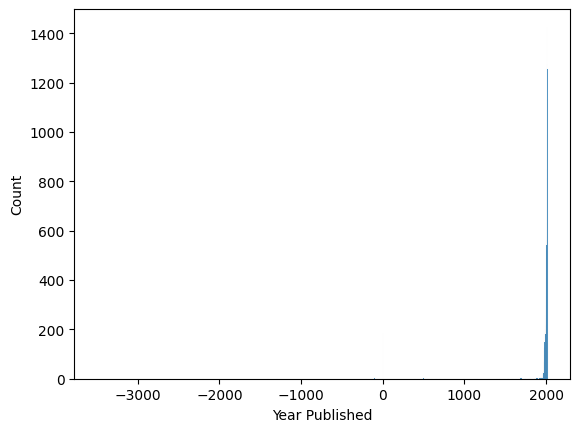

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Year Published']) #distribución de datos para la columna "Min Players" o cantidad mínima de jugadores
plt.show()

# Distribución de los datos

En los siguientes gráficos observamos las siguientes distribuciones:


* Year Published: datos alineado a la derecha
* Min Players: datos alineados a la izquierda

* Max Players: alineado a la izquierda, en esta variable hay 3 juegos entre ellos (Gloomhaven , Pandemic Legacy: Season 1 y  Brass: Birmingham ) que el valor Max Players contiene el número 999. Esto puede ser un error en los datos suministrados o publicados por el sitio web.

* Play Time: alineado a la izquierda
* Min Age: Distribución normal con datos aislados

* Rating Average: Distribución normal con datos aislados


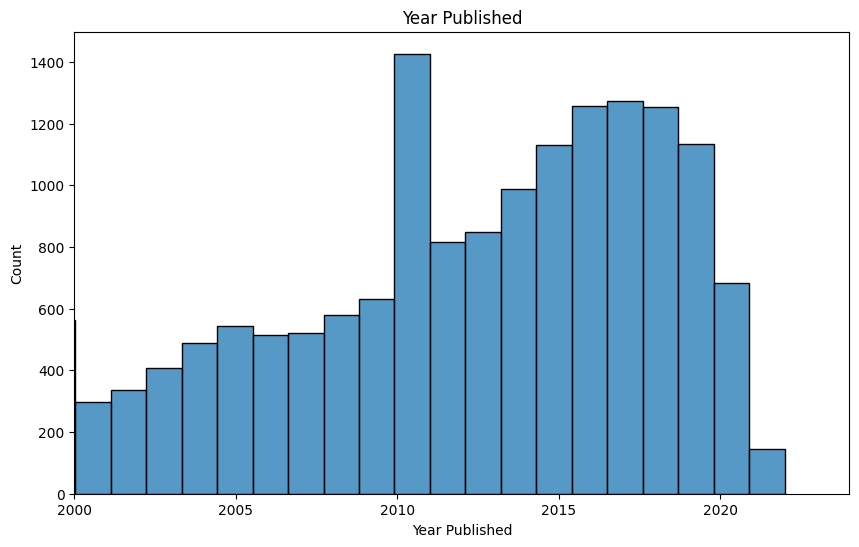

In [35]:
# Para columna Year Published
columns_to_plot = [ 'Year Published' ]


for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.xlim(2000,2024)
    sns.histplot(df[column])
    plt.title(column)
    plt.show()


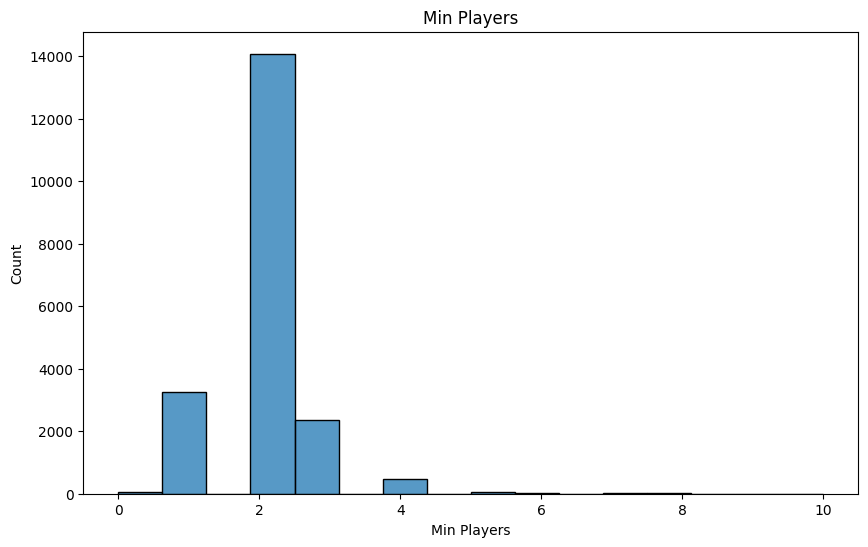

In [37]:
# Para columna Minimum Number of Players
columns_to_plot = [ 'Min Players' ]


for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

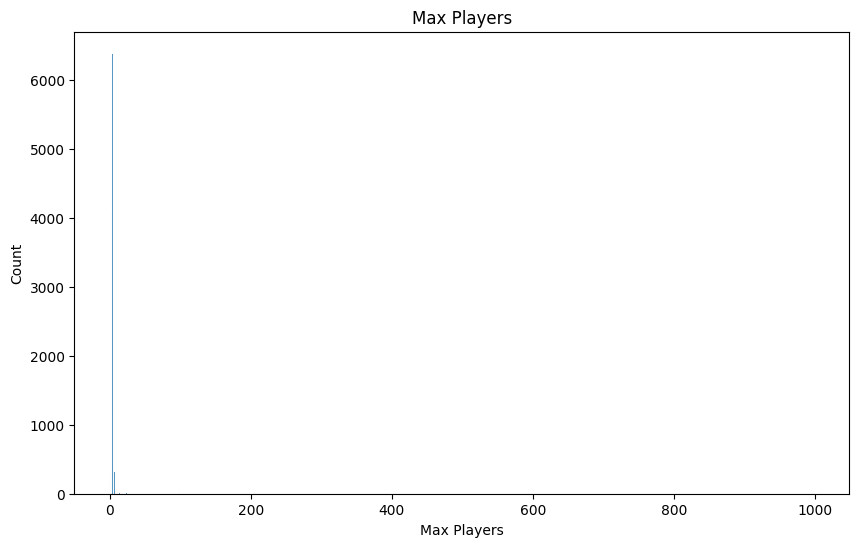

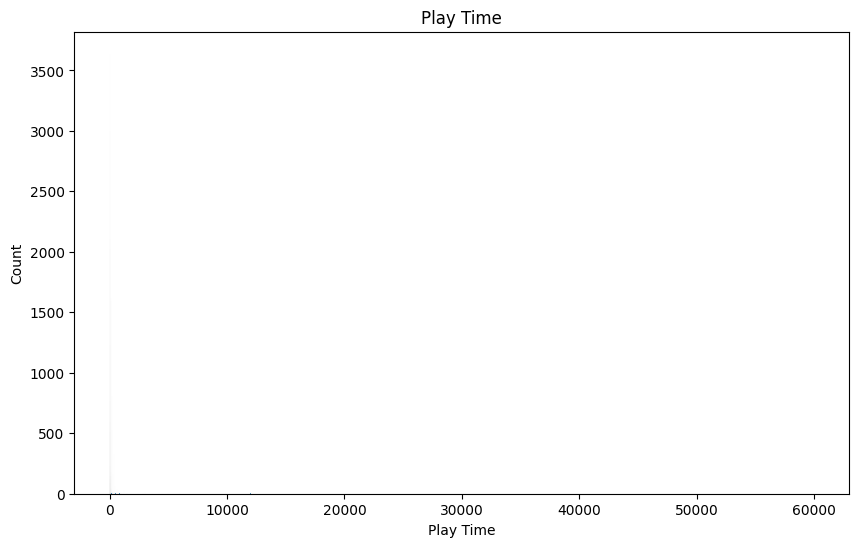

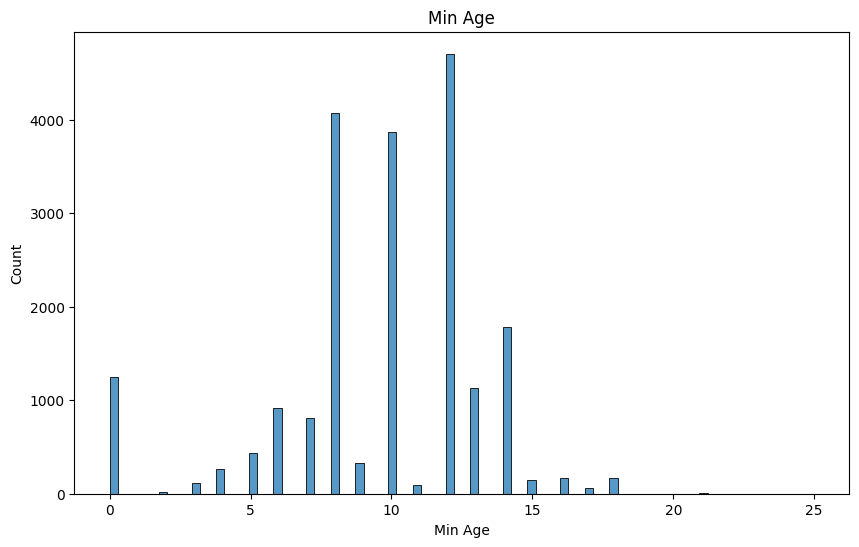

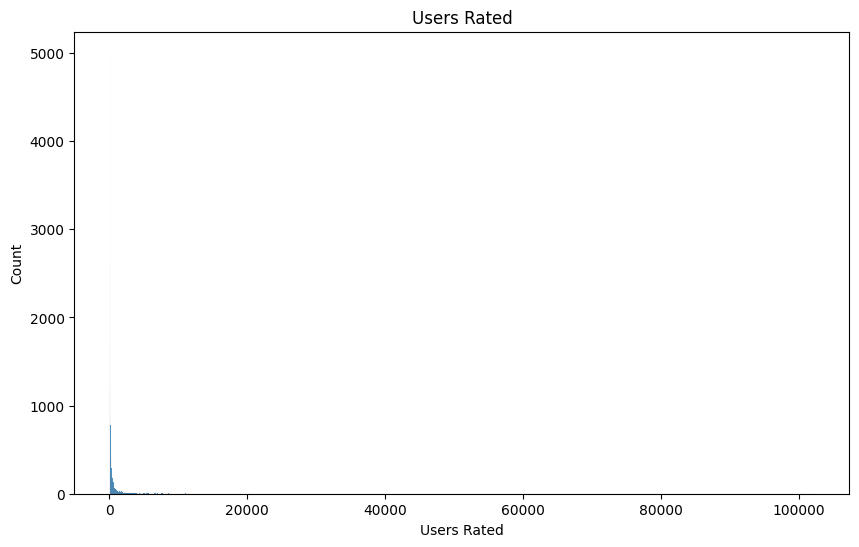

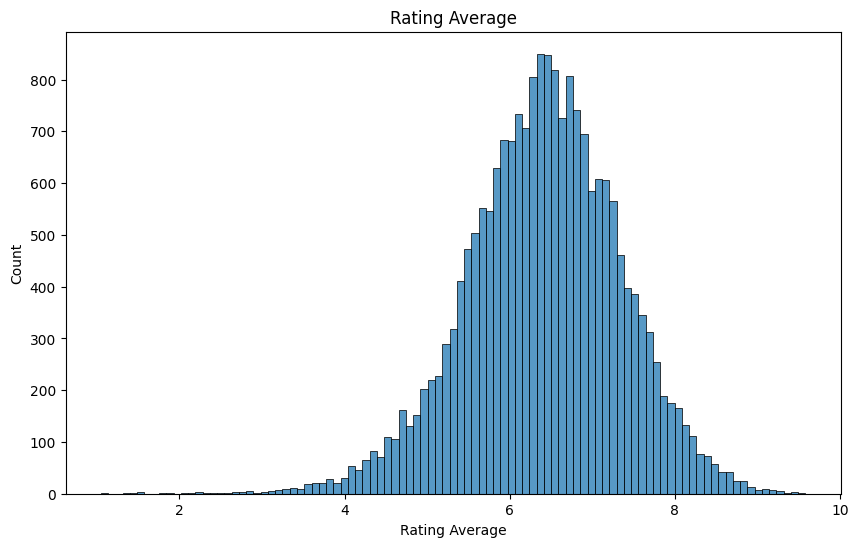

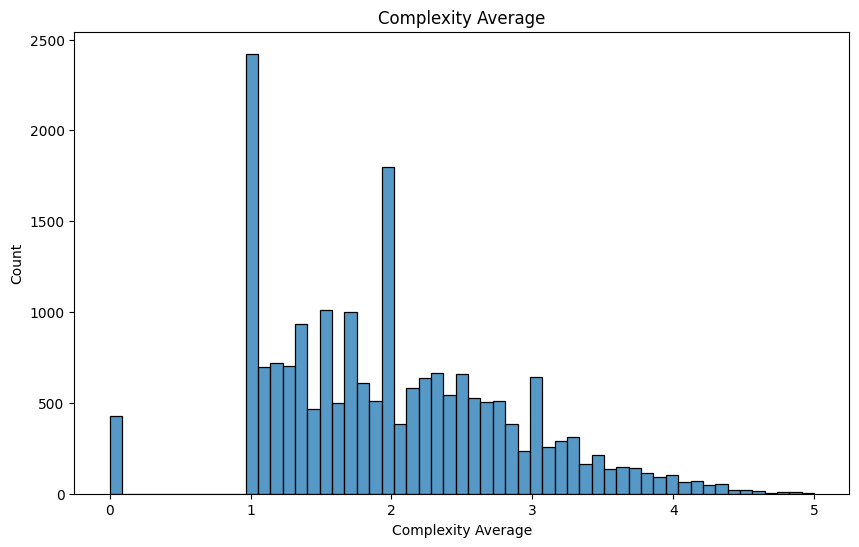

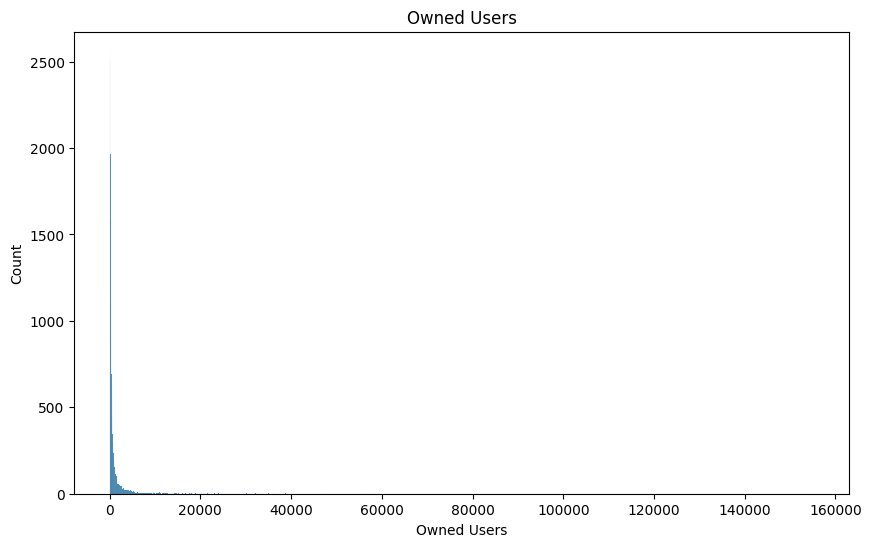

In [39]:
# Para el resto de columnas
columns_to_plot = [ 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average',
       'Complexity Average', 'Owned Users' ]


for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

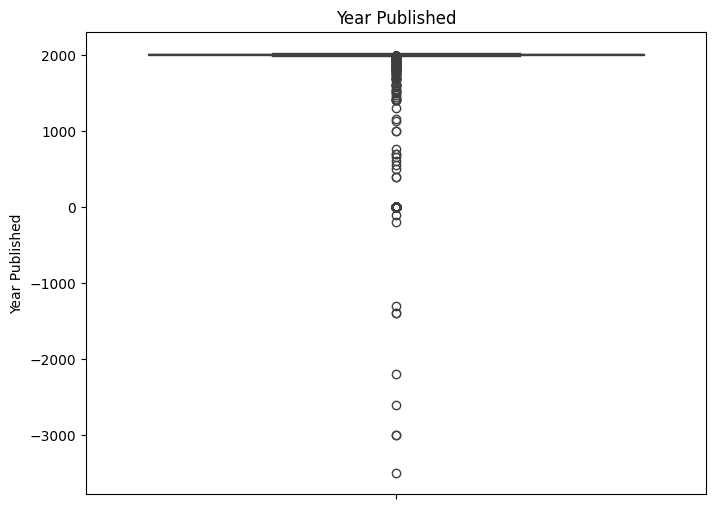

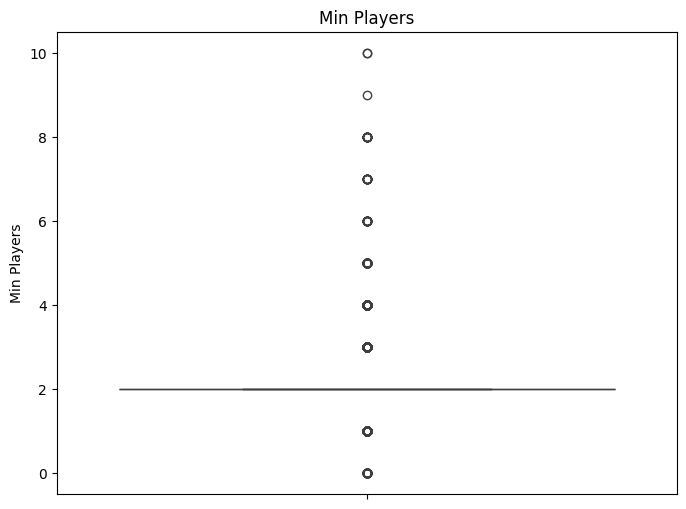

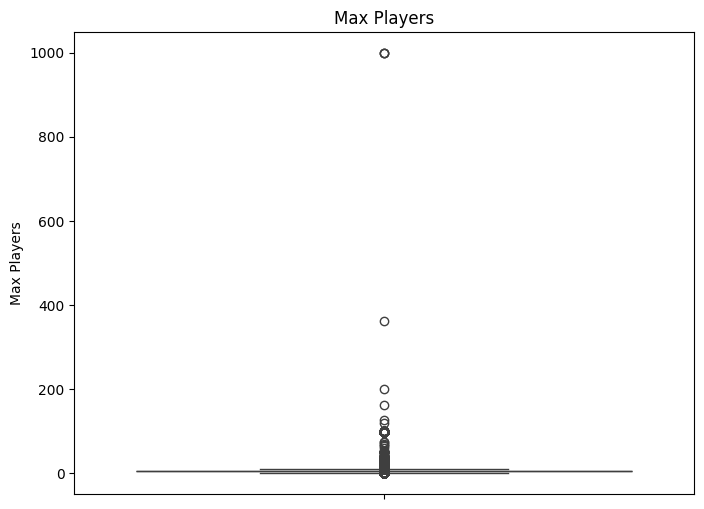

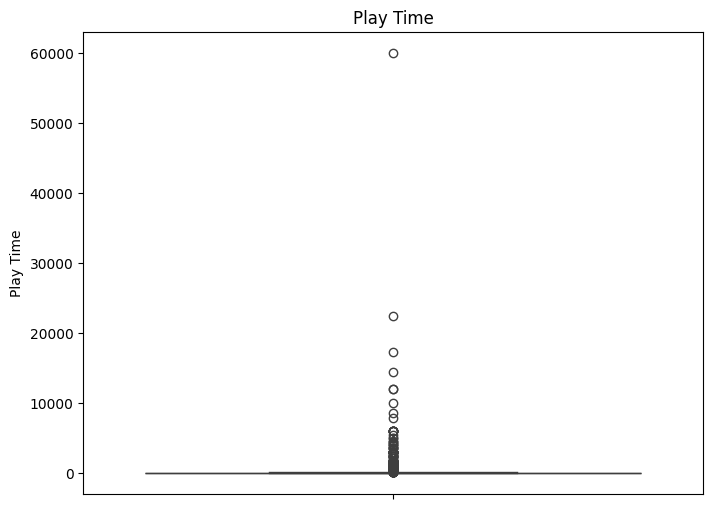

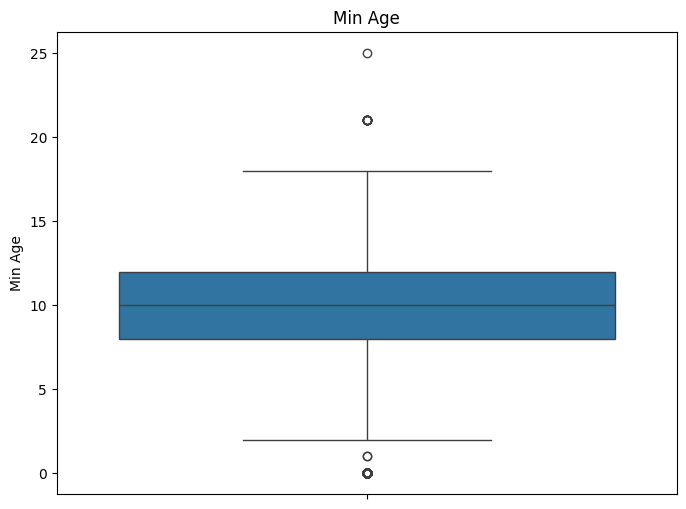

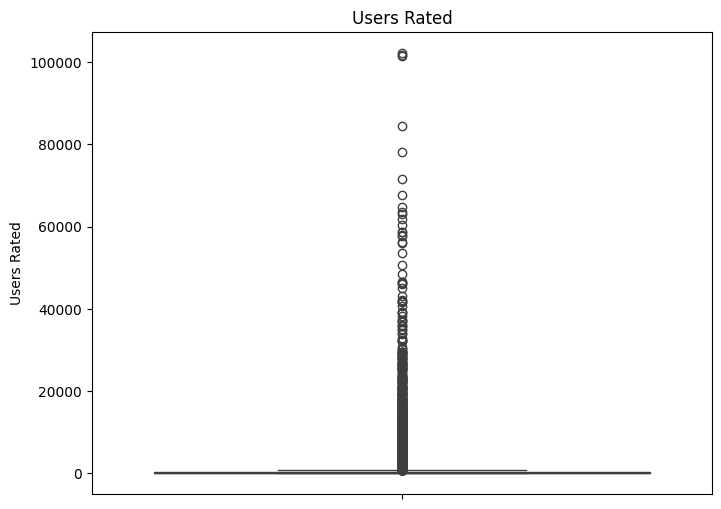

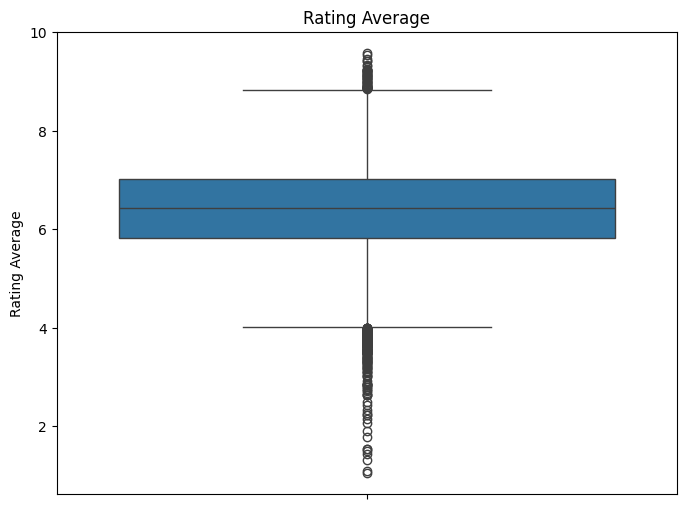

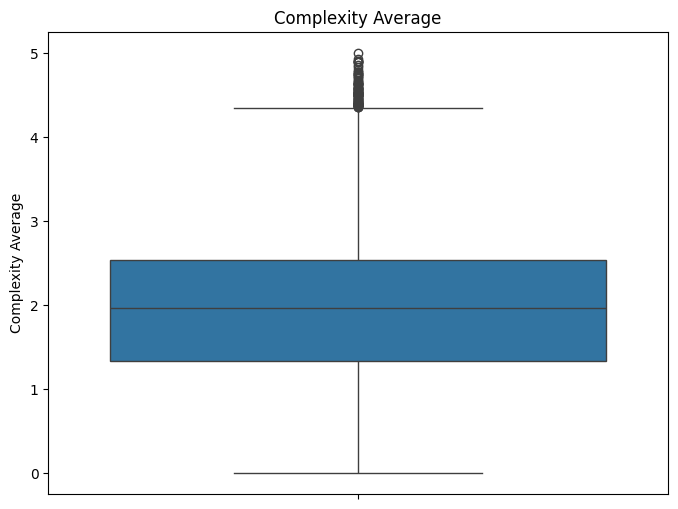

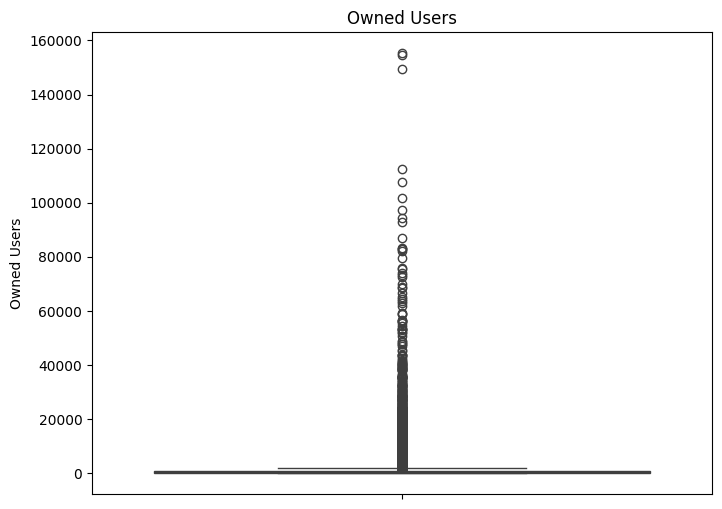

In [40]:
# Column list
columns_to_plot = ['Year Published' , 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average',
       'Complexity Average', 'Owned Users']

# setting up the plot
#

# creating subplots for each column
for colunm in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[colunm])
    plt.title(colunm)
    plt.show()


# Diagramas de Dispersión.



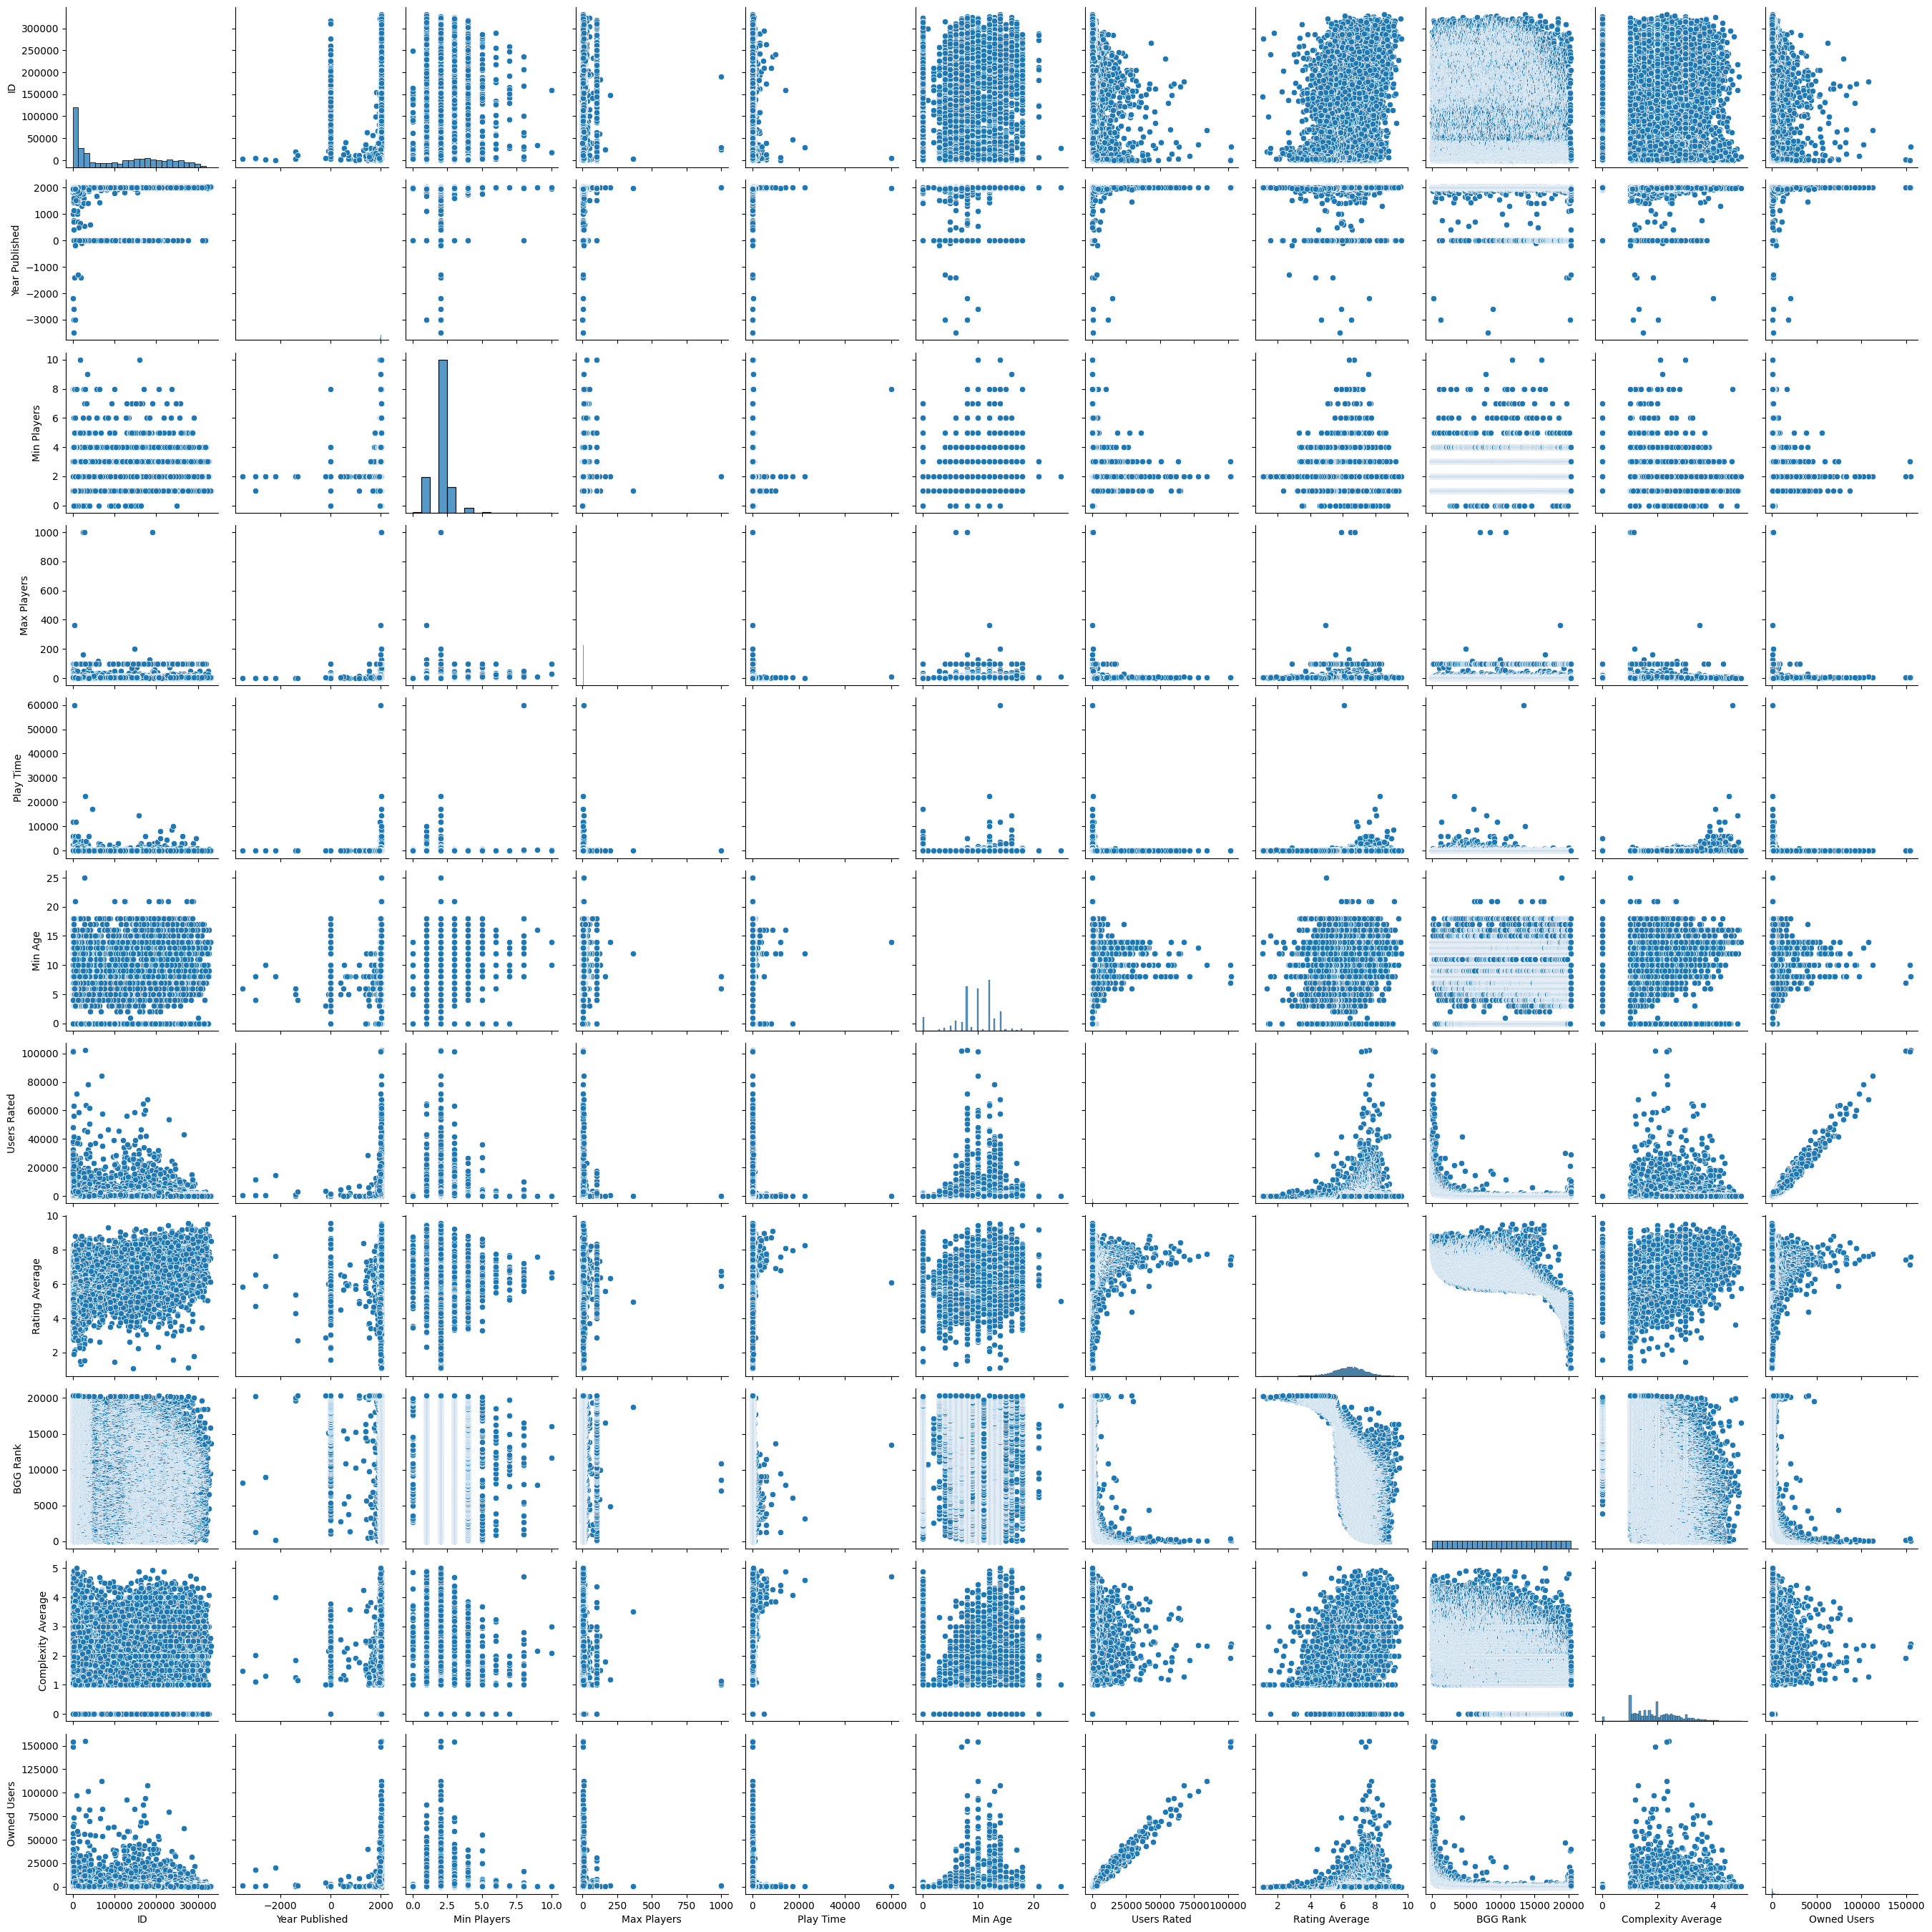

In [41]:
sns.pairplot(df)
plt.show()

In [47]:
df.columns

Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

# Correlación de Pearson

El coeficiente de correlación de Pearson mide la relación lineal entre dos variables. Varía de -1 a 1, donde:

* 1 indica una relación lineal positiva perfecta.
* -1 indica una relación lineal negativa perfecta.
* 0 indica que no hay relación lineal.
El coeficiente de correlación de Pearsonl.


**Interpretación de los valores de correlación**

* 0.9 a 1.0 o -0.9 a -1.0: Correlación positiva o negativa muy alta.
* 0.7 a 0.9 o -0.7 a -0.9: Correlación positiva o negativa alta.
* 0.5 a 0.7 o -0.5 a -0.7: Correlación positiva o negativa moderada.
* 0.3 a 0.5 o -0.3 a -0.5: Correlación positiva o negativa baja.
* 0.0 a 0.3 o -0.0 a -0.3: Correlación positiva o negativa muy baja (débil).

En el siguiente grafico observamos la correlación en nuestros datos, en donde podemos destacar que las Users Rated tienen correlación muy alta con la columna objetivo Owned Users.

La edad y la densidad de pasajeros mantienen correlaciones negativas con respecto a las demás columnas lo que indica que las ultimas embarcaciones de esta compañía han sido más grandes.


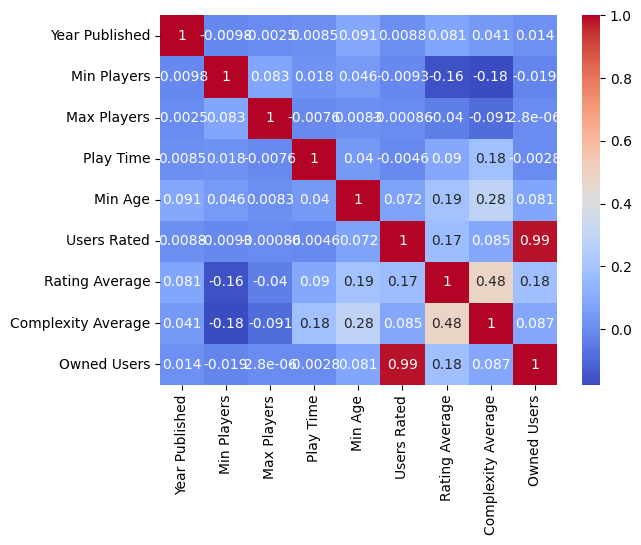

In [48]:
df_corr = ['Year Published' , 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average',
       'Complexity Average', 'Owned Users']
new_df = df[df_corr]
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

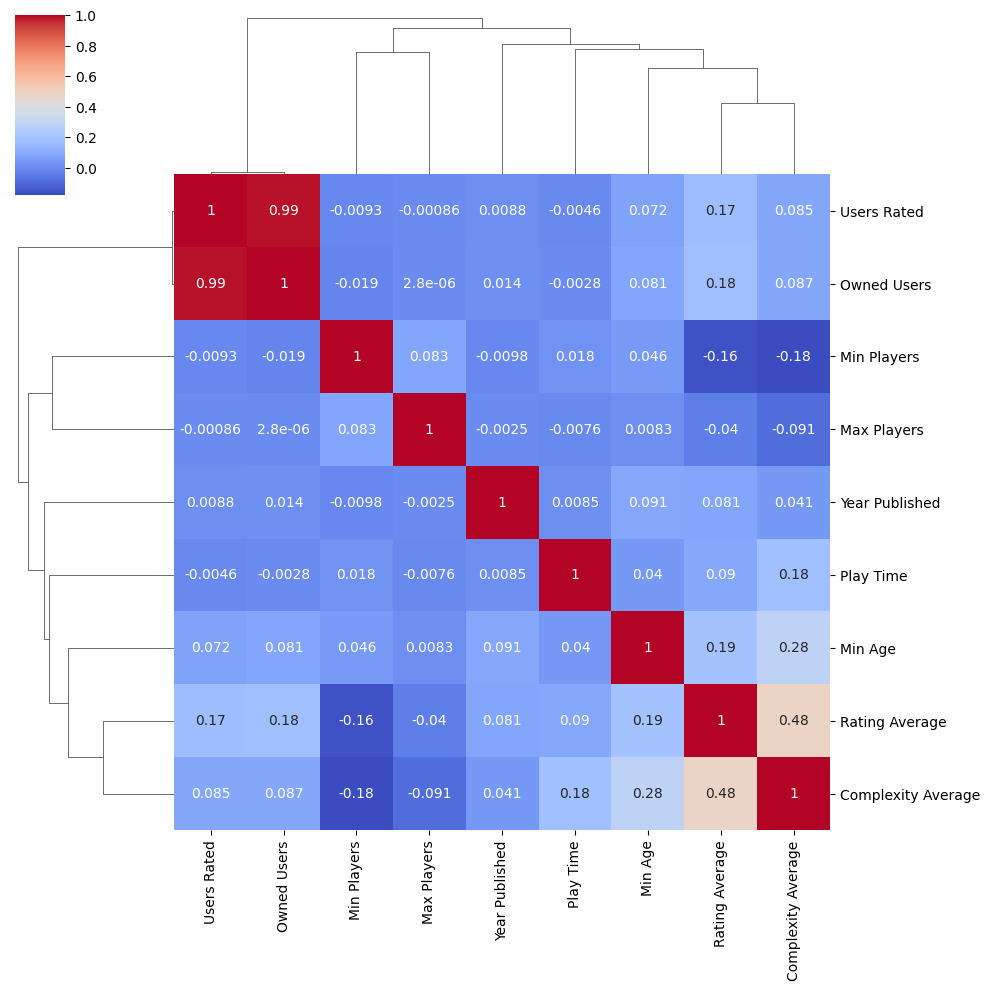

In [49]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

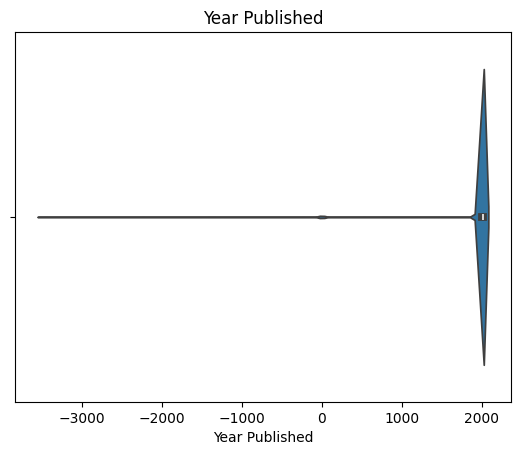

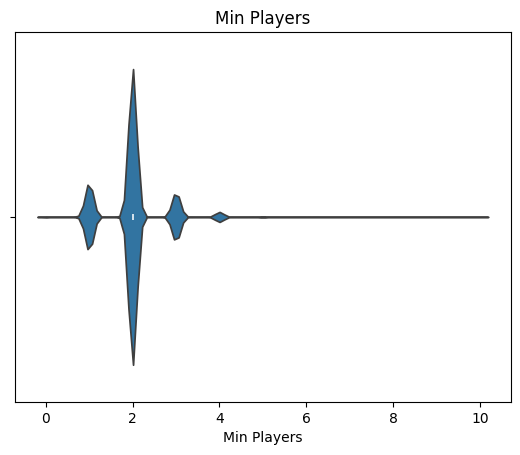

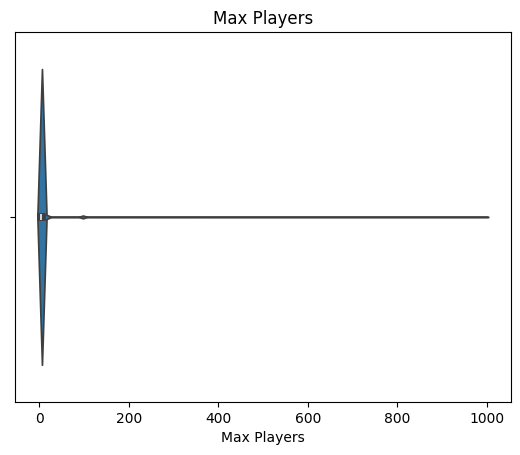

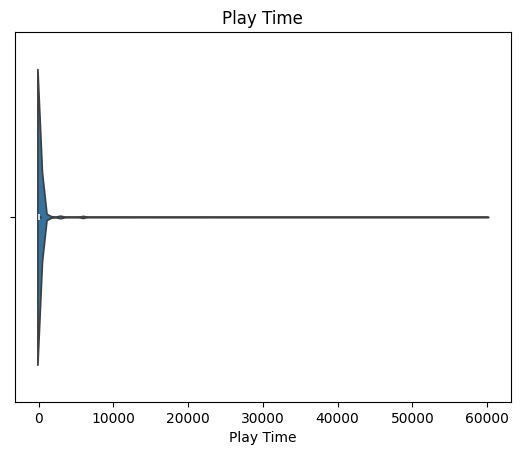

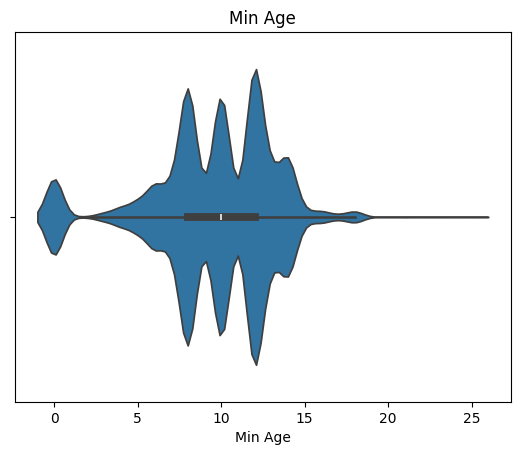

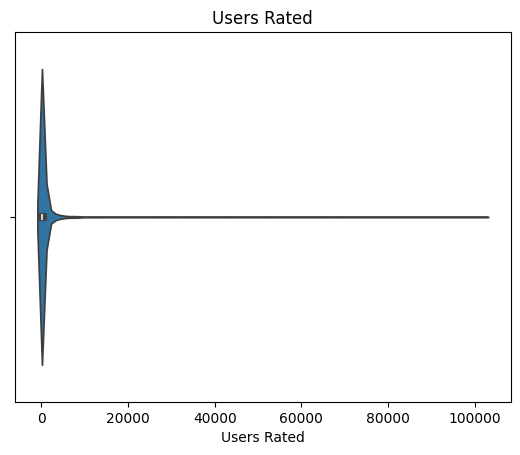

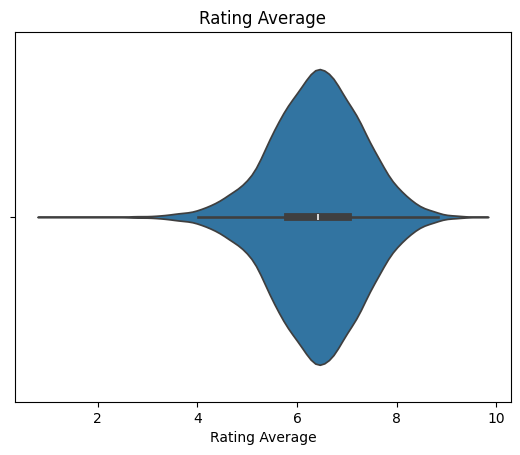

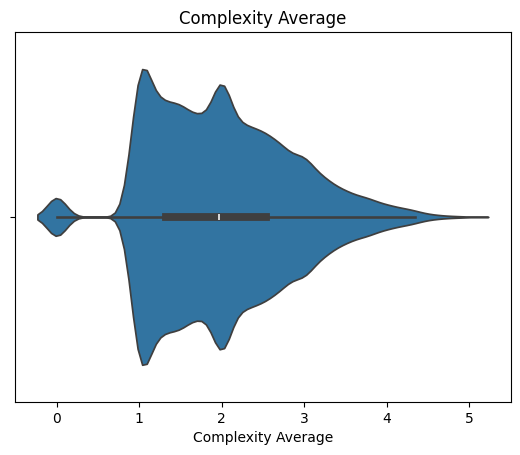

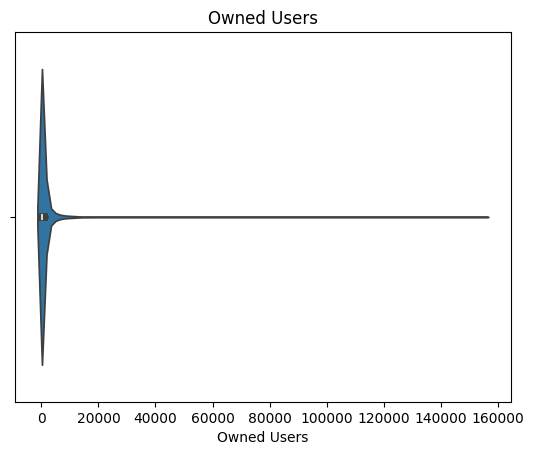

In [46]:
for column in df_corr:
    sns.violinplot(x=column, data=df)
    plt.title(column)
    plt.show()